In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 8
%matplotlib inline

In [2]:
data = pd.read_csv('ex1data1.txt', names=['A', 'B'])
data.insert(0, 'ones', 1)

In [32]:
data.shape

(97, 3)

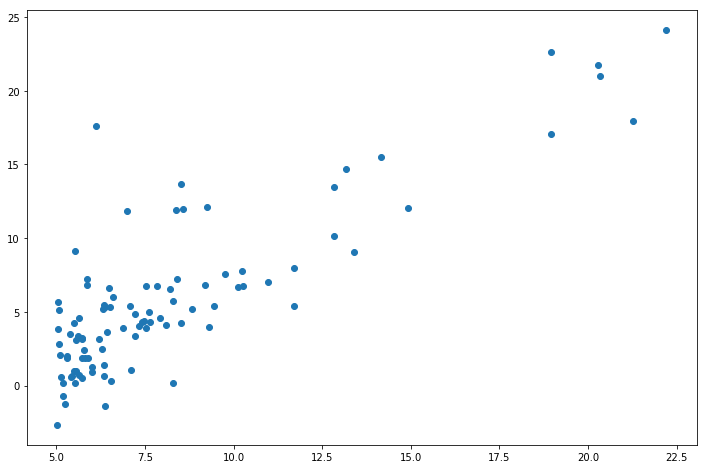

In [31]:
plt.figure(figsize = (12, 8))
plt.plot(data.iloc[:,1], data.iloc[:,2], 'o')
plt.show()

In [4]:
X = data.iloc[:,[0, 1]]
y = data.iloc[:,2]

In [5]:
X.head()

,ones,A
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [6]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: B, dtype: float64

In [7]:
X = np.array(X.values)
y = np.array(y.values)

In [8]:
def costFunction(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y).T
    return np.sum(np.power(((X*theta.T) - y), 2))/(2*len(X))

In [9]:
def gradientDescent(X, y, theta, iter_no, alpha):
    X = np.matrix(X)
    y = (np.matrix(y))
    theta = (np.matrix(theta)).T
    cost = list([])
    for i in range(1, iter_no):
        theta = theta - (alpha/len(X)) * np.multiply((X * theta - y.T), X).sum(axis = 0).T
        cost.append(costFunction(theta.T, X, y))
    return theta, cost

In [10]:
initial_theta = np.array([0, 0])
iter = 4500
alpha = .01

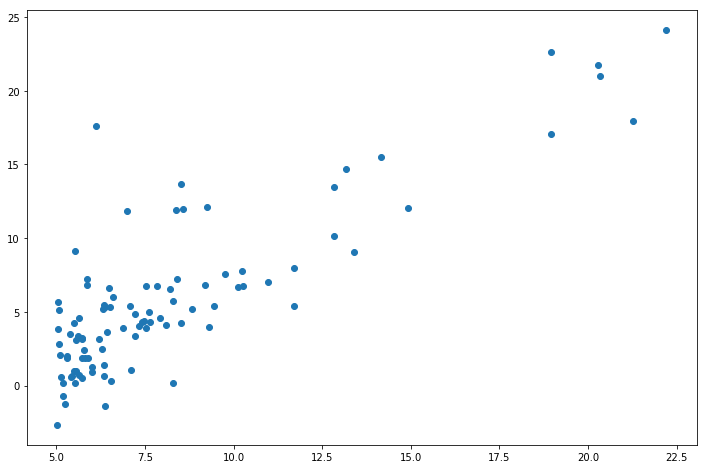

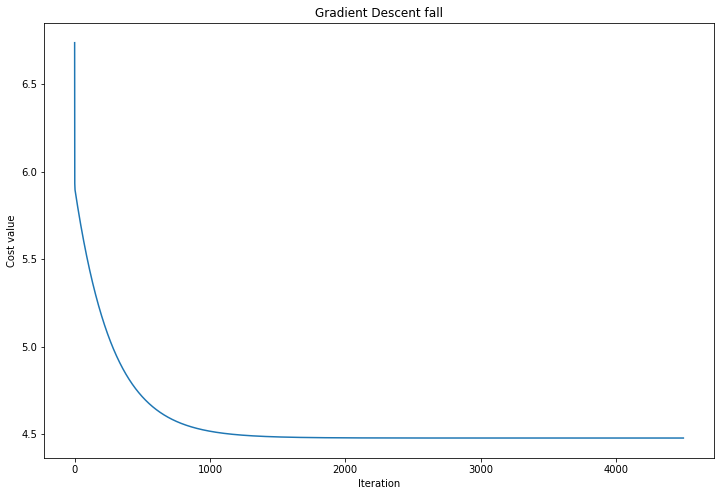

In [11]:
theta, cost = gradientDescent(X, y, initial_theta, iter, alpha)
plt.figure(figsize= (12, 8))
plt.plot(cost)
plt.xlabel("Iteration")
plt.ylabel("Cost value")
plt.title("Gradient Descent fall")
plt.show()

In [12]:
prediction = X * theta

In [13]:
print("Theta by gradient descent :",theta)

Theta by gradient descent : [[-3.89459473]
 [ 1.19291448]]


In [14]:
plt.figure(figsize = (12, 8))
plt.plot(X[:,1], prediction)
plt.plot(X[:,1], y, 'o')
plt.xlabel("X1")
plt.ylabel("y")
plt.title("prediction")

Noramal equation

In [15]:
X_n = np.matrix(X)
y_n = np.matrix(y).T
theta_n = np.linalg.inv(X_n.T*X_n)*X_n.T*y_n

In [16]:
print("Theta by Normal eqn :",theta_n.T)

Theta by Normal eqn : [[-3.89578088  1.19303364]]


In [17]:
prediction_n = X_n * theta_n

In [18]:
plt.figure(figsize = (12, 8))
plt.plot(X[:,1], prediction_n)
plt.plot(X[:,1], y, 'o')
plt.xlabel("X1")
plt.ylabel("y")
plt.title("prediction")

using advanced optimization

In [19]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad = np.zeros(X.shape[1])
    
    for i in range(0, X.shape[1]):
        grad[i] = np.sum(np.multiply(X * theta.T - y, X[:,i]))
    
    return grad
    

In [20]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costFunction, x0=initial_theta, fprime=gradient, args=(X, y))
result

(array([ 0.13535658,  0.71254855]), 81, 4)

In [21]:
new_theta_adv = result[0]

In [22]:
print("Theta by advanced optimzation: ",new_theta_adv)

Theta by advanced optimzation:  [ 0.13535658  0.71254855]


In [23]:
prediction_adv = X_n * np.matrix(new_theta_adv).T

In [24]:
plt.figure(figsize = (12, 8))
plt.plot(X[:,1], prediction_adv)
plt.plot(X[:,1], y, 'o')
plt.xlabel("X1")
plt.ylabel("y")
plt.title("prediction")

In [25]:
costFunction(new_theta_adv, X, y)

6.1939757304434089

In [26]:
costFunction(theta.T, X, y)

4.4769715040630347

In [33]:
costFunction(np.ones(2), X, y)

10.266520491383504